# 📦 Synthetic Manufacturing Anomaly Detection Dataset (2.5M Rows)

This synthetic dataset simulates real-time sensor data and operator logs from a high-throughput industrial manufacturing operation. It is crafted for **big data anomaly detection**, combining structured telemetry and unstructured text to reflect real-world conditions encountered in predictive maintenance, fault diagnostics, and multi-modal machine learning.

---

## 🔧 Dataset Structure

| Column Name     | Type      | Description |
|------------------|-----------|-------------|
| `timestamp`      | datetime  | Timestamp at which data is recorded (1-second intervals). |
| `machine_id`     | int       | Unique identifier for the machine (1 to 10). |
| `temperature`    | float     | Simulated temperature readings in °F. Normal mean ≈ 75°F. |
| `vibration`      | float     | Vibration level of the machine in arbitrary units. Normal mean ≈ 0.5. |
| `pressure`       | float     | Internal pressure reading in psi. Normal mean ≈ 30 psi. |
| `speed`          | float     | Rotational or operational speed in RPM. Normal mean ≈ 1500 RPM. |
| `anomaly`        | int (0/1) | Binary label indicating normal (0) or anomalous (1) record. |
| `operator_note`  | string    | Simulated free-text notes by machine operators or control system logs. Varies by anomaly status. |

---

## ⚙️ Data Generation Details

- **Rows**: 2,500,000 (equivalent to ~4 years and 9 months of 1-minute readings)
- **Anomaly Rate**: Precisely 1.27213123% → 31,803 anomalous rows
- **Machines**: 100 parallel machines with randomized but consistent ID distribution
- **Sensor Simulation**:
  - **Normal Rows**: Gaussian distributions around realistic industrial values
  - **Anomalies**: Statistical shifts simulating overheating, misalignment, pressure drops, or speed failure
- **Textual Data**:
  - **Normal Notes**: Routine log entries (e.g., "All systems nominal", "Routine check complete")
  - **Anomaly Notes**: Simulated alerts and diagnostics (e.g., "Emergency stop triggered due to pressure drop")

---

## 🧠 Use Cases

This dataset supports a variety of advanced analytics and AI applications:

- ✅ **Supervised / Unsupervised Anomaly Detection**
- ✅ **Multi-modal learning** combining sensor telemetry + operator notes
- ✅ **Time-series anomaly segmentation and forecasting**
- ✅ **Text mining and NLP classification** on operational logs
- ✅ **Synthetic benchmarking** for scalable model deployment

---

## 📌 Example Rows

### ✅ Normal Record
```json
{
  "timestamp": "2023-02-17 10:12:00",
  "machine_id": 57,
  "temperature": 74.1,
  "vibration": 0.49,
  "pressure": 30.3,
  "speed": 1508,
  "anomaly": 0,
  "operator_note": "Routine diagnostics passed. No faults detected."
}
y": 0,
  "operator_note": "All systems operational"
}


In [ ]:
import pandas as pd
import numpy as np
import random

# Config
n_samples = 2_500_000
anomaly_rate = 0.0127213123
n_anomalies = int(n_samples * anomaly_rate)
n_machines = 10

# Generate timestamp column (1-minute interval)
timestamps = pd.date_range("2023-01-01", periods=n_samples, freq="S")

# Base sensor data
df = pd.DataFrame({
    "timestamp": timestamps,
    "machine_id": np.random.randint(1, n_machines + 1, size=n_samples),
    "temperature": np.random.normal(loc=75, scale=5, size=n_samples),
    "vibration": np.random.normal(loc=0.5, scale=0.1, size=n_samples),
    "pressure": np.random.normal(loc=30, scale=3, size=n_samples),
    "speed": np.random.normal(loc=1500, scale=100, size=n_samples)
})

# Inject anomalies
anomaly_indices = np.random.choice(n_samples, size=n_anomalies, replace=False)
df["anomaly"] = 0

# Apply abnormal patterns
df.loc[anomaly_indices, "temperature"] += np.random.normal(25, 6, size=n_anomalies)
df.loc[anomaly_indices, "vibration"] += np.random.normal(1.2, 0.4, size=n_anomalies)
df.loc[anomaly_indices, "pressure"] -= np.random.normal(12, 3, size=n_anomalies)
df.loc[anomaly_indices, "speed"] -= np.random.normal(600, 150, size=n_anomalies)
df.loc[anomaly_indices, "anomaly"] = 1

# Textual logs
normal_notes = [
    "Routine system check performed; no deviations found in temperature or vibration.",
    "All sensors operating within nominal ranges. No action required.",
    "Shift log: readings stable across all parameters, including cooling systems.",
    "Preventive maintenance completed — all components verified and functioning.",
    "No alerts from thermal or pressure monitoring modules. Status: Normal.",
    "Automated diagnostics passed; no inconsistencies in pressure trends.",
    "Checked valve actuation and motor alignment — functioning as expected.",
    "Operator reviewed logs; no anomalies reported in last 4 hours.",
    "Daily calibration confirmed — vibration and speed metrics validated.",
    "Inspection completed: all filters clean, seals intact, pressure lines steady.",
    "System load within expected range. Observed thermal output is nominal.",
    "Review of trend data indicates stable operation throughout current shift.",
    "Scheduled downtime log noted; machine idle as per plan.",
    "All KPIs within target thresholds for operational efficiency.",
    "No abnormalities detected; logging standard operational checkpoint."
]


anomaly_notes = [
    "Abnormal temperature spike (>100°F) noted post-load cycle; potential cooling system failure.",
    "Pressure dropped sharply over 5-minute window; investigating possible seal breach.",
    "Operator identified erratic RPM fluctuations; possible encoder miscalibration.",
    "Emergency shutdown triggered due to high vibration (1.9 g); safety override engaged.",
    "Detected non-linear pressure response; actuator valve lag suspected.",
    "Thermal drift detected in sensor #4; flagged for recalibration.",
    "Multiple fault codes generated during peak load operation; system halted automatically.",
    "Anomaly observed in speed regulator output — signal noise exceeds expected range.",
    "Sensor feedback loop failed integrity check; defaulted to safe mode.",
    "Unusual torque load detected on motor axis — flagged for mechanical inspection.",
    "Operator reported metallic noise from bearing housing; vibration levels critical.",
    "Unexpected lag in hydraulic response time; anomaly confirmed by onboard diagnostics.",
    "Machine exhibited unstable oscillation in temperature-pressure coupling.",
    "Control panel displayed redundant fault signals; root cause under review.",
    "Post-anomaly analysis initiated; maintenance ticket #MF2034 raised by technician."
]


# Assign logs
operator_notes = []
for i in range(n_samples):
    if i in anomaly_indices:
        note = random.choice(anomaly_notes)
    else:
        note = random.choice(normal_notes)
    operator_notes.append(note)
df["operator_note"] = operator_notes

# Shuffle
df = df.sample(frac=1).reset_index(drop=True)

# Preview
print(df.head())

# Save if needed
# df.to_csv("synthetic_manufacturing_anomaly_dataset.csv", index=False)


C:\Users\98kar\AppData\Local\Temp\ipykernel_33676\200048085.py:12: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  timestamps = pd.date_range("2023-01-01", periods=n_samples, freq="T")


            timestamp  machine_id  temperature  vibration   pressure  \
0 2023-02-20 04:07:00         100    81.260562   0.384666  35.555270   
1 2023-03-26 00:49:00          28    82.247703   0.493776  30.478072   
2 2027-05-02 18:40:00          39    73.335899   0.546971  25.108434   
3 2023-09-15 17:10:00          95    82.822983   0.622493  31.246588   
4 2026-03-27 21:43:00          30    79.280005   0.524242  27.499631   

         speed  anomaly                                      operator_note  
0  1568.399993        0  Automated diagnostics passed; no inconsistenci...  
1  1588.288720        0  Daily calibration confirmed — vibration and sp...  
2  1377.497944        0  Scheduled downtime log noted; machine idle as ...  
3  1588.016848        0  All KPIs within target thresholds for operatio...  
4  1512.042426        0  Review of trend data indicates stable operatio...  


In [26]:
df.count()

timestamp        2500000
machine_id       2500000
temperature      2500000
vibration        2500000
pressure         2500000
speed            2500000
anomaly          2500000
operator_note    2500000
dtype: int64

In [28]:
df['anomaly'].sum()

31803

Precision: 0.9995
Recall: 0.9995


C:\Users\98kar\AppData\Local\Temp\ipykernel_33676\1706525852.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='anomaly_pred', data=df, palette='coolwarm')


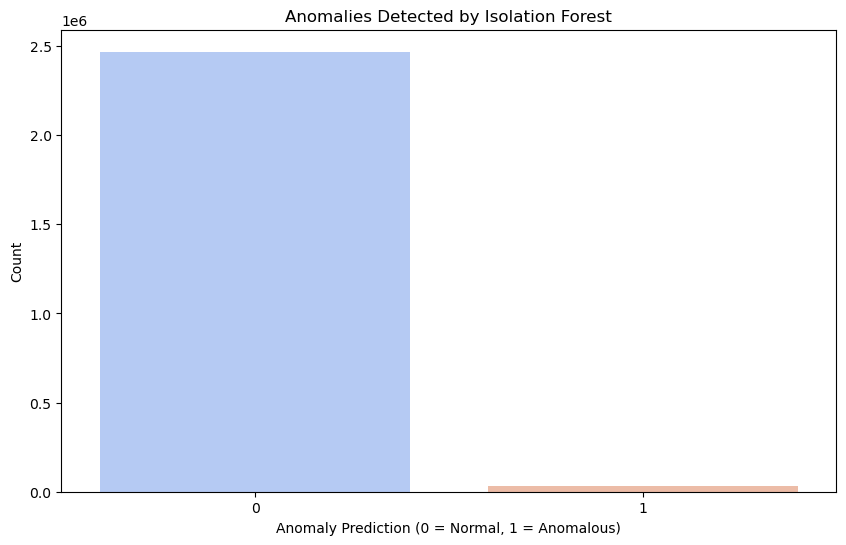

Detected Anomalies: 31804
Actual Anomalies: 31803


In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is the dataset that's already created

# --- Step 1: Data Preprocessing ---
# Remove non-numerical columns for the ML model (e.g., timestamp, operator_note)
df_ml = df.drop(['timestamp', 'operator_note'], axis=1)

# Check for missing values and handle them (drop or impute)
df_ml = df_ml.fillna(df_ml.mean())

# --- Step 2: Feature Scaling (Standardization) ---
# It's common practice to scale numerical features before training anomaly detection models
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_ml[['temperature', 'vibration', 'pressure', 'speed']])

# --- Step 3: Train Isolation Forest Model ---
# Initialize the Isolation Forest model
model = IsolationForest(contamination=anomaly_rate, random_state=42)

# Fit the model on the scaled data
model.fit(df_scaled)

# --- Step 4: Predict Anomalies ---
# Predict anomalies (-1 for anomalies, 1 for normal points)
df['anomaly_pred'] = model.predict(df_scaled)

# Map the anomaly prediction to 0 (normal) and 1 (anomalous)
df['anomaly_pred'] = df['anomaly_pred'].map({1: 0, -1: 1})

# --- Step 5: Model Evaluation ---
# Precision and Recall
precision = precision_score(df['anomaly'], df['anomaly_pred'])
recall = recall_score(df['anomaly'], df['anomaly_pred'])

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# --- Step 6: Visualization ---
# Plot the number of predicted anomalies vs actual anomalies
plt.figure(figsize=(10, 6))
sns.countplot(x='anomaly_pred', data=df, palette='coolwarm')
plt.title('Anomalies Detected by Isolation Forest')
plt.xlabel('Anomaly Prediction (0 = Normal, 1 = Anomalous)')
plt.ylabel('Count')
plt.show()

# Compare the number of detected anomalies to actual anomalies
detected_anomalies = df['anomaly_pred'].sum()
actual_anomalies = df['anomaly'].sum()

print(f"Detected Anomalies: {detected_anomalies}")
print(f"Actual Anomalies: {actual_anomalies}")



In [ ]:
from confluent_kafka import Consumer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import pandas as pd
import json
import numpy as np

# Function to initialize anomaly detection model (Isolation Forest)
def init_model():
    model = IsolationForest(contamination=0.0127, random_state=42)
    return model

# Function to preprocess incoming data
def preprocess_data(data):
    df = pd.DataFrame(data)
    df = df[['temperature', 'vibration', 'pressure', 'speed']]  # Features for anomaly detection
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)  # Scaling features
    return df_scaled

# Kafka Consumer Configuration
consumer_config = {
    'bootstrap.servers': 'localhost:9092',
    'group.id': 'anomaly-detection-group',
    'auto.offset.reset': 'earliest'
}

# Initialize Kafka Consumer
consumer = Consumer(consumer_config)
consumer.subscribe(['manufacturing-data'])

# Initialize the anomaly detection model
model = init_model()

# Continuously consume data and detect anomalies
while True:
    # Consume messages from Kafka topic
    msg = consumer.poll(timeout=1.0)
    
    if msg is None:
        continue
    if msg.error():
        print(f"Error: {msg.error()}")
        continue
    
    # Deserialize the message
    record = json.loads(msg.value().decode('utf-8'))
    data = {
        'timestamp': record['timestamp'],
        'machine_id': record['machine_id'],
        'temperature': record['temperature'],
        'vibration': record['vibration'],
        'pressure': record['pressure'],
        'speed': record['speed'],
        'operator_note': record['operator_note'],
    }
    
    # Preprocess data for anomaly detection
    processed_data = preprocess_data([data])  # We process one row at a time
    prediction = model.predict(processed_data)  # Predict anomaly
    
    # Anomaly detected (prediction = -1 for anomaly, 1 for normal)
    if prediction == -1:
        print(f"Anomaly detected for machine_id {data['machine_id']} at {data['timestamp']}")
        
        # Send the detected anomaly to a new Kafka topic (e.g., 'anomaly-detection-output')
        anomaly_data = {
            'timestamp': data['timestamp'],
            'machine_id': data['machine_id'],
            'anomaly': 1,  # Mark this record as an anomaly
            'operator_note': f"Anomaly detected: {data['operator_note']}"
        }
        
        # Send anomaly to Kafka
        producer.produce('anomaly-detection-output', json.dumps(anomaly_data), callback=delivery_callback)
        producer.poll(0)

# Close the consumer
consumer.close()
